# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## 1.Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

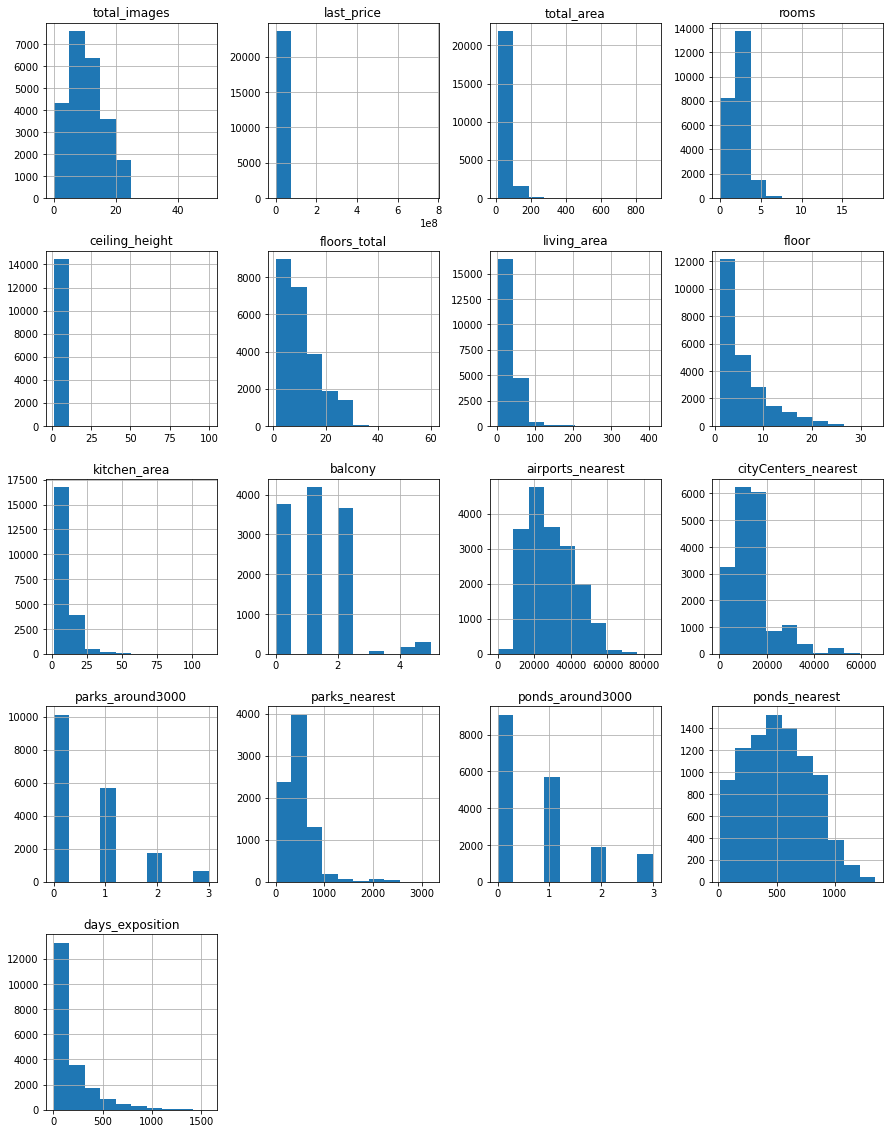

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data.info())
(data.hist(figsize=(15,20)))

In [2]:
# посмотрим таблицу
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Предобработка данных

***Для начала проверим нужно ли изменить какой-либо тип данных.Проверим на логическое соответсвие.***

 -  total_images          23699 non-null  int64          +
 -   last_price            23699 non-null  float64       +
 -   total_area            23699 non-null  float64       +
 -   first_day_exposition  23699 non-null  object        - Необходимо изменить на Datatime
 -   rooms                 23699 non-null  int64         +
 -   ceiling_height        14504 non-null  float64       +
 -   floors_total          23613 non-null  float64       +
 -   living_area           21796 non-null  float64       + 
 -   floor                 23699 non-null  int64         +
 -   is_apartment          2775 non-null   object        - Необходимо изменить на bool,через заполнение пропусков.
 -  studio                23699 non-null  bool           +
 -  open_plan             23699 non-null  bool           +
 -  kitchen_area          21421 non-null  float64        +
 -  balcony               12180 non-null  float64        - Необходимо изменить на int(количество балконов целочисленное)
 -  locality_name         23650 non-null  object         +
 -  airports_nearest      18157 non-null  float64        +
 -  cityCenters_nearest   18180 non-null  float64        +
 -  parks_around3000      18181 non-null  float64        - Необходимо изменить на int(количество парков целочисленное)
 -  parks_nearest         8079 non-null   float64        +
 -  ponds_around3000      18181 non-null  float64        - Необходимо изменить на int(количество прудов целочисленное)
 -  ponds_nearest         9110 non-null   float64        +
 -  days_exposition       20518 non-null  float64        - Необходимо изменить на int(количество дней целочисленное)
 
 

***Все данные будем преобразовывать в процессе заполнение пропусков, т.к при незаполненных при наличии Nan И None выдаст ошибку.***

## Проверим количество пропущенных значений по каждому их столбцов.

In [3]:
print(data.isnull().sum())
print('Общее число пропущенных значений',data.isnull().sum().sum())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
Общее число пропущенных значений 101441


 ***БольшУю часть времени придется потратить на устранение пропусков.Их довольно много.
Попробуем разобраться с каждым последовательно.***

***1) 'ceiling_height'-9195 значений. Многовато для количественной характеристики,но на мой взгляд не указана высота потолков была из-за своей "стандартности". По СНИПу высота потолков должна составлять от 2.5 до 2.7 метров. Проверим не выбивается ли медиана из этого коридора.Если нет,то заменим отсутствующие значения на медиану. Паралльно будем также устранять возможные аномалии.***

In [4]:
#print(data['ceiling_height'].describe())
#для начала разберемся с аномалиями.Потолки не могут быть ниже 2,5 метров.
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5
#print(data.query('ceiling_height > 21'))   А вот аномалия,где неверно разряд числа указан . Исправим разделив на 10.
data.loc[data['ceiling_height'] >= 21, 'ceiling_height'] = data['ceiling_height']/10
# Аномалии убраны.Заполним пропущенные.
print('Медиана высоты потолков равна' , data['ceiling_height'].median(),'метров')
print()
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())# убираем пропуски в "потолках".
print(data['ceiling_height'].describe())

Медиана высоты потолков равна 2.65 метров

count    23699.000000
mean         2.700069
std          0.275966
min          2.260000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64


***2)floors_total - 86.Количество этажей в доме.За малостью выборки оставим значение нулевым.Скорее всего тут человеческий фактор.***

***3) Жилая площадь 1903. Вот это серьезный пропуск. Выборка достаточно большая 8% , да и характеристика сравнимая по значимости с ЗП при оформлении кредита. Попробуем проанализировать данные.***

In [5]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

***По описательной статистике всплыли неправдободобные значения "снизу". Сначала обработаем аномалии. Обратимся к СНиПу.Показатель санитарной нормы на территории РФ общий — 6 кв. м. на человека.
Проверим сколько квартир это значения нарушают.***

In [6]:
# Небольшая аномалия
data.query('living_area < 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.65,17.0,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,0,2.65,25.0,5.0,8,NaN,...,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,2.65,24.0,2.0,22,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21943,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.50,9.0,5.4,1,NaN,...,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.00,8.0,3.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


In [7]:
# Заменим аномальные данные.
data.loc[data['living_area'] < 6, 'living_area'] = None
# Все по СНиПу! Хоть и количество пропусков увеличилось.


*** Поскольку данных отсутствует довольно много, а логичной замены им нет, то попробуем высчитать самостоятельно. Найдем коэффициент соотношения медианной жилой и медианной общей. А после воспользоваться этим коэффиентом при заполнении пропусков. ***

In [8]:
print('Коэффциент соотношения жилой и общей площади =', data['living_area'].median()/data['total_area'].median())

Коэффциент соотношения жилой и общей площади = 0.5769230769230769


In [9]:
# Заполним пропущенные значения жилой площади с помощью коэффициента.
data['living_area']=data['living_area'].fillna(data['total_area']*0.57)

***3)is_apartment - 20924 значений. Львиная доля выборки.Возможно эти данные начали собирать позже,чем все остальные.Заменим на "False".***

In [10]:
# Заполняем пропуски.
data['is_apartment'] = data['is_apartment'].fillna('False')

***4) kitchen_area тоже довольно большой процент незаполненных данных. Возможно это связано с тем,что кухня в студии включена в общую площадь.Проанализируем данные.***

In [11]:
# Гипотеза не подтвердилась,всего 149 совпадений
data.query('kitchen_area == None' and 'studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,14.25,7,False,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.65,25.0,18.20,5,False,...,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,False,...,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,14.82,8,False,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [12]:
# Посмотрим описательную статистику,а также заглянем в СНиП.Кухня должна быть не менее 5кв.Проверим аномалии
print(data['kitchen_area'].describe())
data.query('kitchen_area < 5') 

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.60,5.0,38.40,1,False,...,4.9,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0
298,9,2650000.0,42.8,2017-04-25T00:00:00,2,2.65,5.0,30.00,3,False,...,4.5,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.0
422,8,1700000.0,55.2,2018-03-24T00:00:00,3,2.50,5.0,38.50,5,False,...,4.5,NaN,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,15,2600000.0,27.0,2017-07-10T00:00:00,1,2.75,23.0,18.00,18,False,...,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
1327,6,2650000.0,46.2,2016-12-01T00:00:00,2,2.50,5.0,29.20,5,False,...,4.9,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22839,14,3350000.0,27.0,2018-11-03T00:00:00,1,2.70,16.0,15.39,6,False,...,4.0,2.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,35.0
22849,6,2380000.0,25.0,2016-03-22T00:00:00,1,2.65,25.0,19.00,15,False,...,4.0,1.0,посёлок Шушары,13461.0,19247.0,0.0,NaN,1.0,351.0,140.0
23110,1,2900000.0,34.0,2018-02-01T00:00:00,2,2.90,2.0,20.00,1,False,...,4.0,NaN,посёлок Стрельна,27006.0,23832.0,0.0,NaN,2.0,872.0,196.0
23498,7,1600000.0,54.0,2016-12-26T00:00:00,2,2.50,1.0,33.00,1,False,...,3.5,0.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.0


***На мой взгляд лучше всего заменить все аномальные значения на None.А затем пропущенные заполнить аналогично как в случае с жилой площадью.***

In [13]:
# убираем аномалии
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = None

In [14]:
print('Коэффциент соотношения кухни и общей площади =', data['kitchen_area'].median()/data['total_area'].median())

Коэффциент соотношения кухни и общей площади = 0.1769230769230769


In [15]:
# Заполним пропущенные значения жилой площади с помощью коэффициента.
data['kitchen_area']=data['kitchen_area'].fillna(data['total_area']*0.175)

***5)balcony 11519 значений.практически половина выборки,но здесь логичнее всего ,что не указали - значит балкона и не было.Меняем на "0" и преобразовываем в "Int"***

In [16]:
data['balcony'] = data['balcony'].fillna(0).astype('int') 


***6)locality_name 49 значений. Незначительная выборка.Вероятнее всего человеческий фактор.Гадать на карте не будем.Оставляем без изменений.***

***7)airports_nearest - 5519 значений.Близость аэропортов.Без точных данных скорее всего заполнить пропуски не получится,иначе неверные данные могут сбить потенциального покупателя с толку.Оставим как есть.Проверим на аномалии.***


In [17]:
#data['airports_nearest'].describe()
#Аномальное значение "снизу".Квартира в аэропорту! 
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None
print('Ближайшее объявление к аэропотру',data['airports_nearest'].min())# Больше 6 км. Похоже на правду

Ближайшее объявление к аэропотру 6450.0


***8)cityCenters_nearest 5519 значений. Расстояние до центра города.Здесь я бы не стал заполнять пропуски, т.к это может исказить исследование зависимости средней цену каждого километра,т.к выборка достаточно большая.Оставим как есть.***

In [18]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

***9) Данные по паркам будем рассматривать в паре.***

***Аномалий нет.Заменим пропуски.***

***parks_around3000         5518 - здесь ситуация схожая с балконами.Не указано,скроее всего поблизости парков нет.***

***parks_nearest           15620 - Здесь явно аномалия либо в сборе данных,либо в выгрузке.Такой массив логичной заменой не***

***заполнить.Аномальный пик гарантирован.Оставим без изменений и обратимся к тем,кто отвечал за сбор иливыгру этих данных.***

***Характеристика косвенно влияет на покупку квартиры.***

In [19]:
print(data['parks_around3000'].describe())
# Заполняем пропуски и приводим к "Int"
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int') 

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


***10)С данными по водоемам поступим аналогично.В этих данных аномалий также не наблюдается.Данные практически аналогичны данным
по паркам. До 3х км указаны значения, в далее "пустота". И количество пропупусков примерно совпадаетмс парками.***
   

In [20]:
print(data['ponds_around3000'].describe())
# Заполняем пропуски и приводим к "Int"
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')# Заполняем пропуски и приводим к "Int"

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


***11) days_exposition 3181 значения.Количество дней от публикации до снятия. Скорее всего данные объявления все еще активны,либо не были сняты после продажи.
Здесь логичных замен нет.Оставляем как есть.***

### Теперь займемся дубликатами. Явными и не очень. 

In [21]:
#Изучим уникальные значениями в поселке и проверим на дубликаты.
print(data['locality_name'].unique())
#для начала приведем все значения к нижнему регистру.
data['locality_name'] = data['locality_name'].str.lower()
#заменяем "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
# Приводим поселки к одной форме.
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
# Проверяем на явные дубликаты.
print('-----------------------------------------------------')
print('Количеcтво явных дубликатов:', data.duplicated().sum())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [22]:
# Проверим еще раз на пропуски после обработки.
print(data.isnull().sum())
print('Общее число пропущенных значений',data.isnull().sum().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5543
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64
Общее число пропущенных значений 44587


#### **Итог по работе над пропусками можно сделать следущие выводы.**
- До обработки e нас было 101441 пропусков, после предобработки осталось 44587. Таким образом мы заполнили 57% пропущенных значний. Общее количество пропусков составляет 8.5 % от всего датафрейма(до предоработки 19,4%)
- Данные,которые были пропущены пользователями практически все поддаются логической замене(высота потолков,наличие балконов,являются ли это аппартаментами),либо статистическе небольшие.***
-Большой вопрос к картографическим данным.90% пропусков это картографические данные. Особое опасение вызывает пропуск в данных "близость к центру".
Логиской замены им не найти,а замена на статический показатель типа среднего или медианы может сильно исказить исследование.В прудах и парках тоже дыры в заполнении,но они не так важны.
Неизвестно по каким причинам появились. Точно стоит передать эту информацию к тем,кто предоставлял данные.

### Посчитайте и добавьте в таблицу новые столбцы

In [23]:
# Цена одного квадратного метра
data['price_one']=(data['last_price']/data['total_area']).astype('int')
#Для вывода дня,месяца,года необходимо изменить формат даты до дня.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%d')
#День публикации
data['day_publ']=data['first_day_exposition'].dt.dayofweek
#Месяц публикаци
data['month_publ']=data['first_day_exposition'].dt.month
#Год публикации
data['year_publ']=data['first_day_exposition'].dt.year
# Категорезируем этажи. Сначала запишем сортировочную функцию.Потом добавим новый столбец.
def floor_categ(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_categ, axis=1)
# Переведем расстояиния в км.
data['centers_nearest']=round(data['cityCenters_nearest']/1000)
# Все столбцы добавлены
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one,day_publ,month_publ,year_publ,floor_type,centers_nearest
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


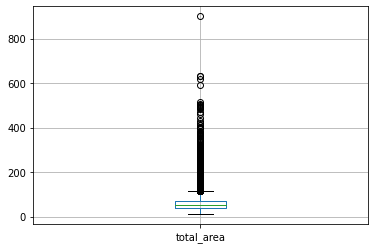

In [24]:
import matplotlib.pyplot as plt
# Посмторим размах значений для определения границ нормального распределения общей площади и отсечения выбросов
print(data['total_area'].describe())
print(data.boxplot(column=['total_area'], grid=True))

AxesSubplot(0.125,0.125;0.775x0.755)


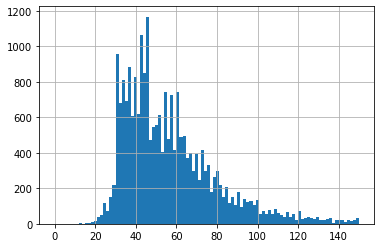

In [25]:
# границы оказались в районе 150 квадратов, что ,пожалуй, соответствует действительности.Дальше уже квадратура "элитной" недвижимость
print(data['total_area'].hist(bins = 100,range = (0,150),grid = True))


***Основной диапазон составляют квартиры с площащью от 30 до 45 квадратных метров.***

*** Изучим данные жилой площади.***

AxesSubplot(0.125,0.125;0.775x0.755)
count    23699.000000
mean        34.596763
std         22.347734
min          6.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


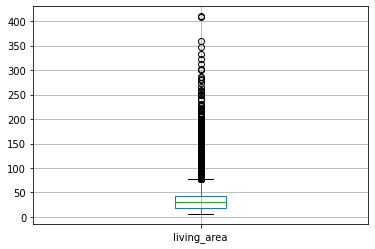

In [26]:
# Повторим процедуры аналогичные общей площади для жилой.
print(data.boxplot(column=['living_area'], grid=True))
print(data['living_area'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


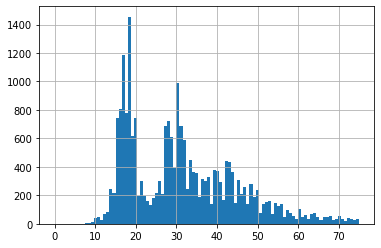

In [27]:
# границы оказались в районе 75 квадратов
print(data['living_area'].hist(bins = 100,range = (0,75),grid = True))

***Основной диапазон составляют квартиры с площащью от 18 до 30 квадратных метров. В целом границы диапазонов общей и жилой площади пропорционально схожи (что в общем-то логично). Однако непонятно откуда провал в районе 24. Возможно какие-то особенности планировки и это значение является пограничным между 2х и 3х комнатными квартирами.***

AxesSubplot(0.125,0.125;0.775x0.755)
count    23699.000000
mean        10.516179
std          6.031443
min          2.100000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


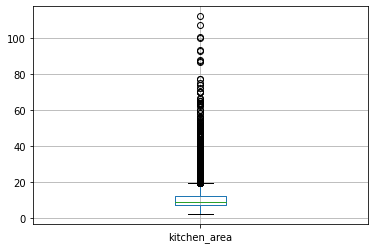

In [28]:
#Посмотрим что у нас с кухнями
print(data.boxplot(column=['kitchen_area'], grid=True))
print(data['kitchen_area'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


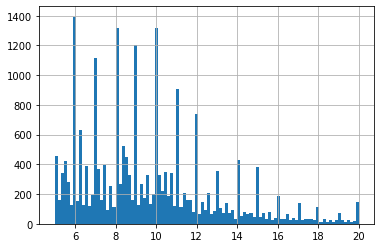

In [29]:
# Гистаграмма площади кухни. Больше 20 рассматривать уже не стоит.
print(data['kitchen_area'].hist(bins = 100,range = (5,20),grid = True))

***По кухне тоже все распределено "нормально". 6-11 метров - вполне стандартный диапазон.***

AxesSubplot(0.125,0.125;0.775x0.755)
count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


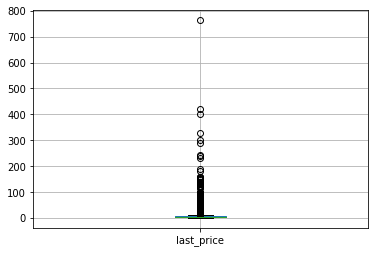

In [30]:
# Самое "волнительное" - цена объекта 
#Для наглядности "ящика" переведем в цену в миллионы.
data['last_price']=(data['last_price'].astype('int')/1000000)
print(data.boxplot(column=['last_price'], grid=True))
print(data['last_price'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


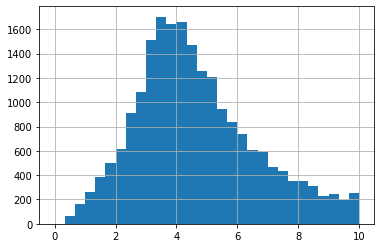

In [31]:
# "Ящик" несильно помогает визуально. Уж слишком велик размах.Видно лишь,что он в пределах 10млн. Ограничимся этим значением.Корзин возьмем поменьше,чтобы цена пиков виднее была.
print(data['last_price'].hist(bins = 30,range = (0,10),grid = True))

***Диапазон цены от 3.5 до 4.5 млн. Невысокая цена для Питера, неудивительно, что  количество таких покупок максимально.***

AxesSubplot(0.125,0.125;0.775x0.755)
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


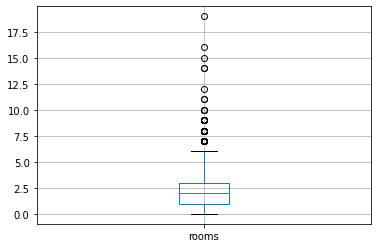

In [32]:
# Количество комнат. Здесь ограничимся 6ю.
print(data.boxplot(column=['rooms'], grid=True))
print(data['rooms'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


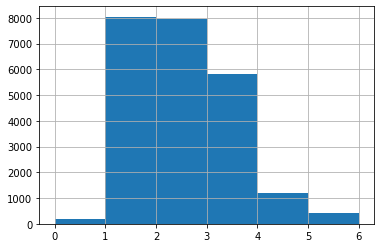

In [33]:
print(data['rooms'].hist(bins = 6,range = (0,6),grid = True))

***Вновь ничего из ряда вон. 1-3 комнатная квартиры. Ни добавить, ни убавить.***

AxesSubplot(0.125,0.125;0.775x0.755)
count    23699.000000
mean         2.700069
std          0.275966
min          2.260000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64


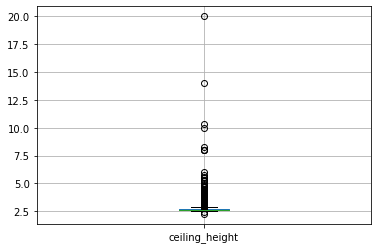

In [34]:
#Высота потолков. На всякийй случай проверил Boxplotom без заполнения пропусков(все таки 9000+ пропусков могут изменить любую статистику).Но не в этом случае) )
print(data.boxplot(column=['ceiling_height'], grid=True))
print(data['ceiling_height'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


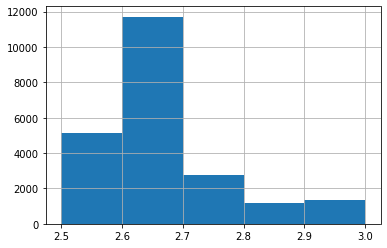

In [35]:
print(data['ceiling_height'].hist(bins = 5,range = (2.5,3),grid = True))

***Все по СНиПу!!! 2.5-2.7 метров.***

AxesSubplot(0.125,0.125;0.775x0.755)
count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


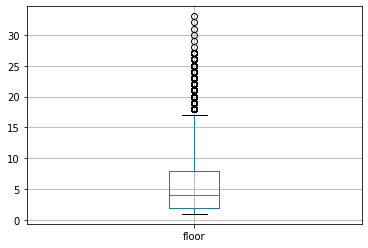

In [36]:
#Этаж
print(data.boxplot(column=['floor'], grid=True))
print(data['floor'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


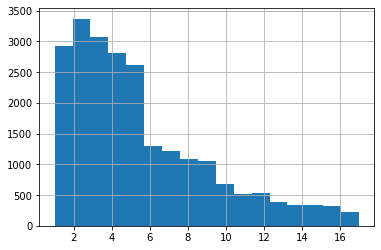

In [37]:
# Не Нью-Йорк. 17 этажей.
print(data['floor'].hist(bins = 17,range = (1,17),grid = True))

***Выше пятого не берем,вдруг лифт неисправен!***

AxesSubplot(0.125,0.125;0.775x0.755)


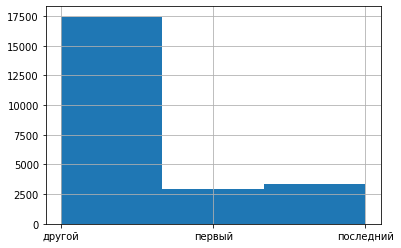

In [38]:
#Проверим типы этажей. Здесь достаточно гистаграммы.
print(data['floor_type'].hist(bins = 3))

***Иллюстрация объявления : "Первый и последний этажи не предлагать!"***

AxesSubplot(0.125,0.125;0.775x0.755)
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


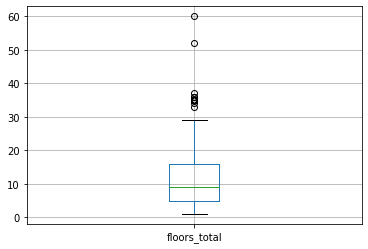

In [39]:
# Распределение этажности домов
print(data.boxplot(column=['floors_total'], grid=True))
print(data['floors_total'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


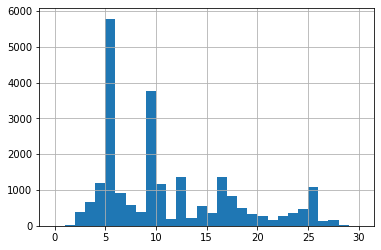

In [40]:
#Ограничимся 30-ю этажами.
print(data['floors_total'].hist(bins = 30,range = (0,30),grid = True))

***Питер-город "пятиэтажек"?!)***

AxesSubplot(0.125,0.125;0.775x0.755)
count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


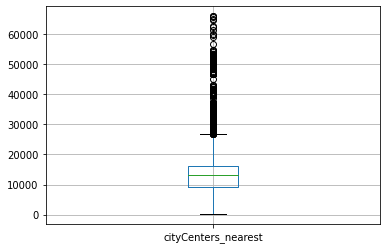

In [41]:
#расстояние до центра города в метрах
print(data.boxplot(column=['cityCenters_nearest'], grid=True))
print(data['cityCenters_nearest'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


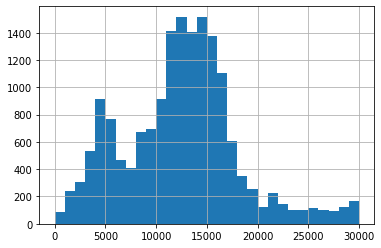

In [42]:
#Значимый диапазон в пределах 28км.
print(data['cityCenters_nearest'].hist(bins = 30,range = (0,30000),grid = True))

 *** 12 - 15 км. 20 минут на авто и вы в центре! ***

AxesSubplot(0.125,0.125;0.775x0.755)
count    18156.000000
mean     28795.258096
std      12629.420568
min       6450.000000
25%      18585.000000
50%      26726.000000
75%      37273.500000
max      84869.000000
Name: airports_nearest, dtype: float64


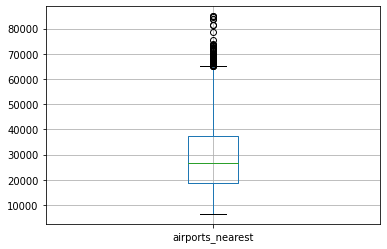

In [43]:
#расстояние до ближайшего аэропорта
print(data.boxplot(column=['airports_nearest'], grid=True))
print(data['airports_nearest'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


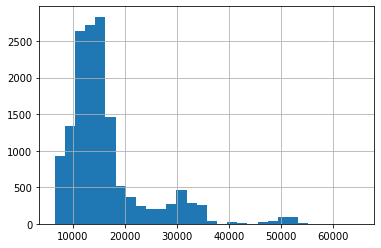

In [44]:
# Внушительный размах 65км.
print(data['cityCenters_nearest'].hist(bins = 30,range = (6500,65000),grid = True))

***10-18 км.20 минут и вы в другой стране)***

AxesSubplot(0.125,0.125;0.775x0.755)
count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


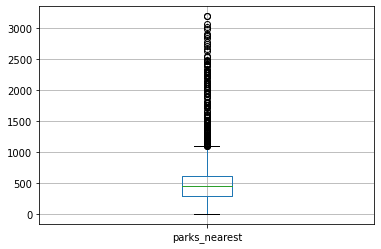

In [45]:
#расстояние до ближайшего парка
print(data.boxplot(column=['parks_nearest'], grid=True))
print(data['parks_nearest'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


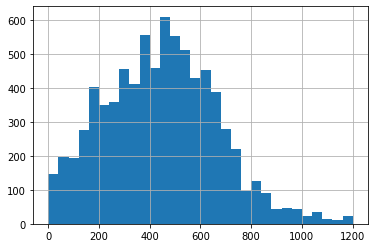

In [46]:
#Чуть более км.
print(data['parks_nearest'].hist(bins = 30,range = (0,1200),grid = True))

***Вспоминаем,что большинство данных были заполнены в группе до 3000км . Поэтому и значение в шаговой доступности 500м.***

AxesSubplot(0.125,0.125;0.775x0.755)


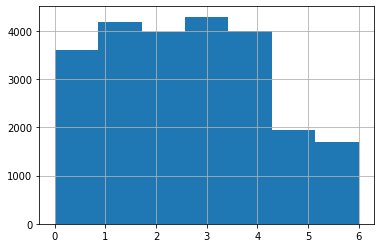

In [47]:
print(data['day_publ'].hist(bins = 7,grid = True))

***По гистограмме видно четкое разделение на будни и выходные. Логика в целом прослеживается ,т.к люди в выходные дни могут иметь свои планы и не склонны решать серьезные вопросы,к коим несомненно относится покупка недвижимости.***

AxesSubplot(0.125,0.125;0.775x0.755)


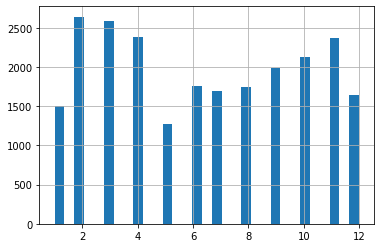

In [48]:
print(data['month_publ'].hist(bins = 31,grid = True))

***Здесь также наюлюдается логическая связка "работа-отдых" только в разрезе года. Декабрь-Январь "выходные месяцы", затем идет 
резкий всплеск "февраль-апрель" люди вкатываются в рабочий ритм. Потом сезон отпусков с мая. С постепеннным ростом до декабря.***

AxesSubplot(0.125,0.125;0.775x0.755)
Среднее количестово дней 180
Медиана: 95.0


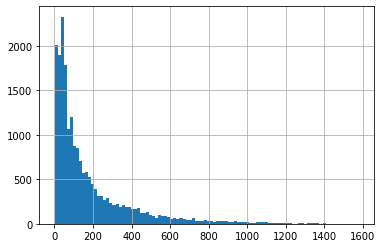

In [49]:
# Изучим скорость продаж. 
print(data['days_exposition'].hist(bins = 100,grid = True))
# В таком виде гистограмма не очень информативна из-за своего масштаба.Видно ,что после 200 дней(примерно полгода)количество снятых объявлений стремиться к 0.
#Рассчитаем среднее,медиану. Поробуем отсечь долгие объявления.
print('Среднее количестово дней',data['days_exposition'].mean().astype('int'))
print('Медиана:',data['days_exposition'].median())
#Медиана оказалась в 2 раза меньше среднего из-за длинного хвоста 

<AxesSubplot:>

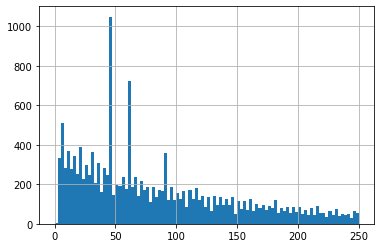

In [50]:
# Среднее значение и гистограмма показывают,что основная масса объявлений находится в диапазоне 250 дней.Построим гистограмму в этом диапазоне.
(data['days_exposition'].hist(bins = 100,range=(0,250),grid = True))

In [51]:
# Крайне странные пики посмотрим на их значения.Посчитаем сколько объявлений было снято и через сколько дней после размещения.

data['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

***Если судить по первым пяти значениям,то очень похоже на автоматическое снятие объявлений через определенный срок(неделя,пол-месяца,месяц,полтора,два) Если в поиске задать запрос, выдаются крупнейшие площадки продаж недвижимости( 30 дней - "Авито",45 дней -"Яндекс недвижимость",90 -"Домклик"). Можно было бы удалить все пики, кратные 15ти, но их размерность выбивается только из 3х групп. 45 , 60, 90. Подчистим их,предварительно построив ящик для определения границ.***

AxesSubplot(0.125,0.125;0.775x0.755)


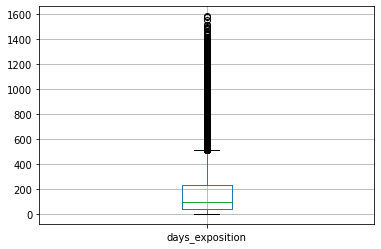

In [52]:
print(data.boxplot(column=['days_exposition'], grid=True))

In [53]:
#Для изучения скорости времени продажи уберем аномальные пики и ограничив 1,5 годами срок давности 
exeptions_day = [45,60,90]
data_clean =data.query('days_exposition not in @exeptions_day & days_exposition <540' )
print(data_clean['days_exposition'].describe())
print(data_clean['days_exposition'].median())


count    18445.000000
mean       133.641854
std        126.790525
min          1.000000
25%         40.000000
50%         90.000000
75%        191.000000
max        539.000000
Name: days_exposition, dtype: float64
90.00000000000001


***После очистки данных выделилась граница,которая выделяет  скорость быстрой продажи - 40 дней.А необычно долгие это 540 дней или 1,5 года.***
____________________________________________________________________________________________________________________________
*** Общий вывод:
Изучив все параметры можно собрать портрет самой привлекательной с точки зрения покупателей квартиры. Это 1-3х комнатная квартира общей площадью от 30 до 45 квадратных метров общей и 18-30 жилой площади со стандартными потолками 2.5-2.7 метров и такой же стандартной кухней 5-10 квадратов. Не первый и последний этаж в 5-10 этажном доме.Равноудаленной от центра города и аэропорта на 15-18 км. Цена в пределах 3.5-4.5 млн. Конечно цена и условия будут варьироваться от множества условий.Но эти усредненные паратметры можно использоваться для поиска аномальных объявлений. Например,мошенники могут привлекать неоправданно низкой ценой.***


###  Зависимость цены от факторов

***1.Цена и общая площадь ***

Корреляция Пирсона =  0.6965023284424369
Коррелеция Пирсона до очистки =  0.6536750579657243


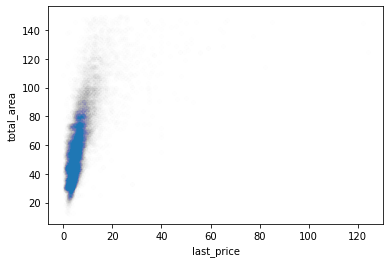

In [54]:

# Общая площадь. Для начала сделаем выборку по значениям boxplot из первой части исследования для того,чтобы график был нагляднее.
data_area = data.query('total_area < 150')
#Поскольку значенй много, то нагляднее всего будет построить диаграмму рассеяния с низким коэффециентом прозрачности. И вывести коэффициент корреляции.
data_area.plot(x='last_price', y='total_area', kind='scatter',alpha=0.003)

#И вывести коэффициент корреляции.
print('Корреляция Пирсона = ',data_area['total_area'].corr(data_area['last_price']))
print('Коррелеция Пирсона до очистки = ',data['total_area'].corr(data['last_price']))


***Здесь все логично и очевидно, выше площадь-выше цена.Для покупки стандартной жилой недвижимости это практически аксиома.Коэффициент корреляции достаточно сильный(и по очищенным данным и по первоначальным). Диаграмма рассеивается линейно вверх,что лишь подтверждает связь.***

***2.Цена и жилая площадь***

Корреляция Пирсона =  0.4879014546504513


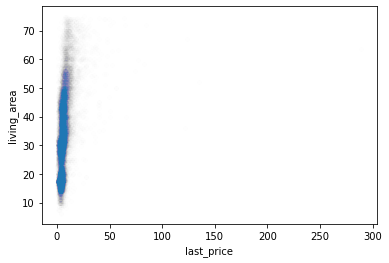

In [55]:
# Общая жилая площадь. Повторим все шаги аналогично общей площади.
data_living_area = data.query('living_area < 75')
#Поскольку значенй много, то нагляднее всего будет построить диаграмму рассеяния с низким коэффециентом прозрачности. И вывести коэффициент корреляции.
data_living_area.plot(x='last_price', y='living_area', kind='scatter',alpha=0.003)

#И вывести коэффициент корреляции.
print('Корреляция Пирсона = ',data_living_area['living_area'].corr(data_living_area['last_price']))


***Здесь коэффициет корреляции не такой сильный как в случае с общей площадью (хотя связь несомненно имеется почти 50%) и диаграмма имеет более вертикальный вид. Я думаю здесь "замешаны" квартиры студии у которых нет стандартного разделения в жилой площади,следовательно и данные более шумные,что сказалось на корреляции.***

***3.Цена и площадь кухни***

Корреляция Пирсона =  0.47262414246126117


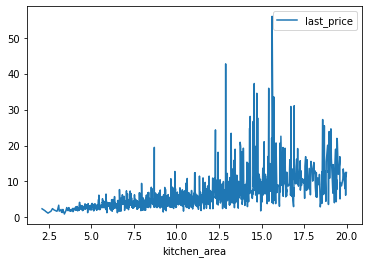

In [56]:
#Площадь кухни.Здесь ограничим выборку по boxplot из первой части .
data_kitchen_area = data.query('kitchen_area < 20')
pivot_kitchen_area=data_kitchen_area.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['median'])
pivot_kitchen_area.plot(y = 'median')
#И вывести коэффициент корреляции.
print('Корреляция Пирсона = ',data_kitchen_area ['kitchen_area'].corr(data_kitchen_area ['last_price']))

***Однозначного влияния вывода по графику сделать нельзя,хотя наблюдается тенденция к увеличению цены с ростом .График на отрезке до значения 12 м2 равномерно(хоть несильно заметно)утолщается. Дальше,видимо, стандартная планировка заканчивается и начинают попадаться аномальные цены( 50+ за кухню 15,5 м2) и очевидная кореляция пропадает.***

***4. Цена и количество комнат***

Корреляция Пирсона между количеством комнат и ценой =  0.36724855921457294
Корреляция Пирсона между количеством комнат и общей площадью =  0.7449616731393996


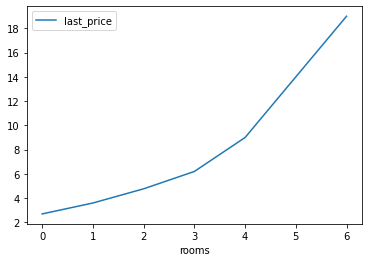

In [57]:
#Количество комнат.Здесь ограничим выборку по boxplot из первой части .
data_rooms = data.query('rooms < 7')
pivot_data_rooms=data_rooms.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
pivot_data_rooms.plot(y = 'median')
#И вывести коэффициент корреляции.
print('Корреляция Пирсона между количеством комнат и ценой = ',data_rooms['rooms'].corr(data_rooms['last_price']))
print('Корреляция Пирсона между количеством комнат и общей площадью = ',data_rooms['rooms'].corr(data_rooms['total_area']))


***Вот здесь сильное расхождение между графиком медианной цены ,который выглядит практически линейным и коэффциентом корреляции.Количество комнат также достаточно сильно скоррелировано с общей площадью(которая цену объясняет на 70%).Но Пирсон между комнатами и ценой = 36. Здесь нужно смотреть почему на ту или иную квартиру выставляется "аномальная" для заданного количества комнат цена. Престижный район, исторический центр или какой то фактор,который вообще не учтен в наших данных.Очевидно что таких объявлений ни одно и ни два.***

***5.Цена и этаж***

AxesSubplot(0.135,0.125;0.755x0.755)
AxesSubplot(0.135,0.125;0.755x0.755)


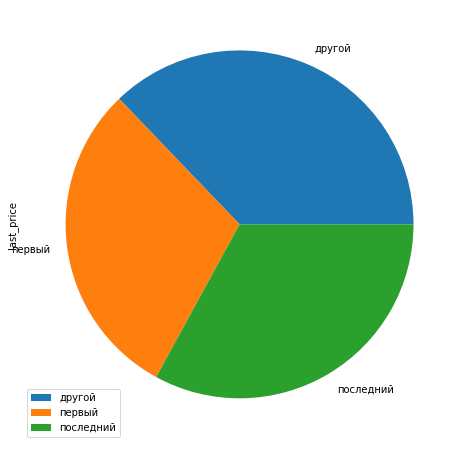

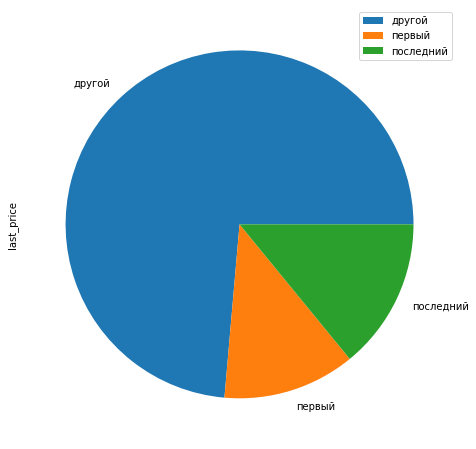

In [58]:
# Рассмотрим группу этажей.Через сводную узнаем медианную цену и в круговой диаграмме посмотрим какой кусок пирога "жирнее".
pivot_data_rooms = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['count','median'])
# "пирог" цены
print(pivot_data_rooms.plot(y='median',kind='pie',figsize=(8,8)))
# "пирог" количества предложений по этажам.
print(pivot_data_rooms.plot(y='count',kind='pie',figsize=(8,8)))

***Несмотря на то,что подавляющее число предложений не относятся к крайним этажам, медианные цены примерно равны ,а значит на цену не влияют.***

*** 6.Цена и день недели ***

<AxesSubplot:xlabel='day_publ'>

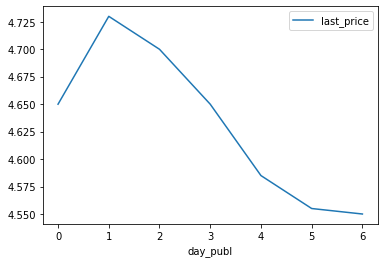

In [59]:
#Разберемся с днями неделями и ценами.
pivot_day = data.pivot_table(index = 'day_publ', values = 'last_price', aggfunc = ['median'])
pivot_day.plot(y = 'median')


***Вновь зависимость будни-выходные. Снижаем цену для привлечения траффика. Как мы помним на выходных объявлений публиуется меньше.***

*** 7.Цена и месяц ***

<AxesSubplot:xlabel='month_publ'>

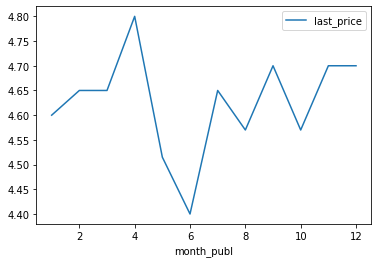

In [60]:
# Зависимость цены и месяца публикации
month_day = data.pivot_table(index = 'month_publ', values = 'last_price', aggfunc = ['median'])
month_day.plot(y = 'median')

***Вспоминаем распределение по количеству публикаций по месяцам.Максимальная цена в первом квартале,пока есть желающие.Потом снижаем цену для привлечения траффика для тех,кто не поехал в отпуск.И постепенный рост до декабря.***

***8.Цена и год***

<AxesSubplot:xlabel='year_publ'>

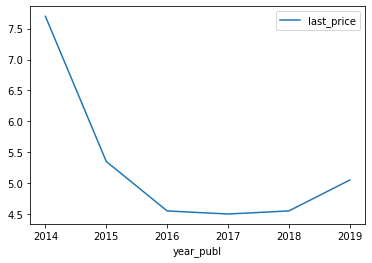

In [61]:
# Зависимость цены и года публикации
year_publ = data.pivot_table(index = 'year_publ', values = 'last_price', aggfunc = ['median'])
year_publ.plot(y = 'median')

***График отражает все,что происходило в нашей стране . Кризис 2014 не обошел и  рынок недвижимости.Рухнул рынок валютной ипотеки. Квартиры стали мельчать(это видно по медианной цене).В 2016 году вошло в обиход слово «шуваловка»(это квартиры около 20 м2) — речь идет о квартирах определенного формата, по аналогии со «сталинками» и хрущевками. «Шуваловки» же очень хорошо характеризуют тенденцию на рынке жилой недвижимости, сложившуюся во второй половине 2010-х. 
С первого квартала 2017 рынок восстановился и начался рост с учетом новых реалий рынка недвижимости.***



***9.Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.***

In [62]:
#Найдем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
most_pop_town = data.pivot_table(index = 'locality_name', values = 'price_one', aggfunc=['count', 'mean'])
most_pop_town.columns = ['count', 'mean']
# Отсортируем 10 городов с самым большим количеством объявлений
most_pop_town_high = most_pop_town.sort_values('count', ascending = False).head(10)
# Отсортируем 10ку по средней цене за квадратный метр.
most_pop_town_high_print = most_pop_town_high.sort_values('mean',ascending = False)
print(most_pop_town_high_print)


                   count           mean
locality_name                          
санкт-петербург    15721  114848.565231
пушкин               369  103125.373984
деревня кудрово      299   92473.086957
поселок парголово    327   90175.489297
поселок мурино       556   85681.305755
поселок шушары       440   78676.904545
колпино              338   75424.150888
гатчина              307   68745.693811
всеволожск           398   68654.007538
выборг               237   58141.489451


***Самая высокая стоимость среди 10 самых больших городов по количеству объявлений ожидаемо оказался Питер со средней ценой 114848р,а самая низкая в Выборге с ценой 58141р.***

***11.Зависимость стоимости объектов расстояния до центра города.***

<AxesSubplot:xlabel='centers_nearest'>

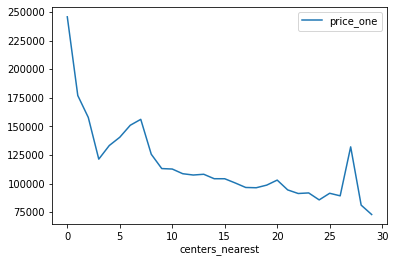

In [63]:
#Cредняя цену каждого километра в Петербурге.
#Выделим объявления Питера в отдельный массив.
pivot_piter = data.loc[data['locality_name'] == 'санкт-петербург']
# Удалим пропуски,т.к логичной замены на первом этапе им не нашлось
pivot_piter=pivot_piter.dropna(subset=['centers_nearest'])
# воспользуемся сводной таблицей для просчета средней цены на км.
plot_piter = pivot_piter.pivot_table(index = 'centers_nearest', values = 'price_one', aggfunc = 'mean')
# Построим график
plot_piter.plot()


***Чем дальше в лес,тем дешевле квадраты) А если серьезно ,то график ожидаемо,показывает тенденцию к снижению цены при удаленности от центра,несмотря на отдельные всплески роста.***

# Общий вывод



***В рамках данного исследования был проведен анализ цен на недвижимость в Санкт-Петербурге и Ленинградской области.***

***На этапе предобработки информации был проведен анализ и замена некоторых типов данных, а также заполнены часть отсутствующих данных. Есть замечания по поводу большой части отсутствующиющих картографических данных.Логичной замены таких данных нет.
Поэтому необходимо обратить внимание на этот сектор информации. В группах данных,предоставляемых клиентами основная  человеческий фактор.Часть данных можно заменить логически.***

***На этапе исследований данных были проведены 
1)Исследование на аномальные значения(слишком низкие или слишком высокие потолки,квартира в аэропорту и т.д.). Некоторые из  этих данных были заменены логичными значениями, некоторые удалены.***

***2)Проведены удаления полных  дубликатов.***

***3)Далее были проведены исследования  на предмет распределенния основных показателей. Начиная от дня публикации заканчивая стоимостью квартиры.С помощью гисторамм и метода "ящика с усами" были выявлены интревалы и распределение наиболее статистически значимые параметры.По их результатам был составлен портрет квартриры с самыми ходовыми для продажи параметрами. Это стандартная по площади 1-3хкомнатная квартира,умеренно удаленная от центра. Оставшиеся параметры описаны в исследовании.***

***4)Далее были исследованы коррееляционные и логические связи отдельных параметров со стоимостью квартиры. Самая сильная корреляционная связь цены с общей площадью. Оставшиеся связи описаны в исследовании.***

***5)Отдельным исследованием был выявлен город с самым большим количеством объявлений и самой высокой средней стоймостью квадратного метра (спойлер! это Санкт-Петербург). И выявлена  зависимость цены квадратного метра и удаленности от центра города.***


***В целом на цену квартиру влияет множество параметров, где-то прослеживается прямая,где-то обратная связь. Каких-то однозначных параметров нет и все их нужно рассматривать в совокупности.***


